<a href="https://colab.research.google.com/github/manishaachary13/Amazon-Prime/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name
$\color{blue}{\text{Amazon Prime TV Shows and Movies}}$



## **Project Summary**

Project Summary
should be like this:
Data Preprocessing :

Getting the dataset

Importing libraries

Importing datasets

Finding Missing Data

Encoding Categorical Data

Data Cleaning and Feature Engineering

Exploratory data analysis(EDA) :

1.Firstly Checked correlation between Each Features in dataset.

2.Checked if bluetooth and wifi available or not???

3.Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

4.Checked can Ram, Screen Height ,Screen width,pixel Height ,pixel width be affected in mobile Price??

5.Checked can 4G and 3G be affected in mobile Price??

6.Checked can FC (front camera megapixels) ,PC (Primary camera Megapixels) and Mobile Weight affected in mobile Price??

# GitHub Link -


# Problem Statement

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has 2 csv files and it is a mix of categorical and numeric values.



**Data Overview**

This dataset contains +9k unique **titles** on Amazon Prime with 15 columns containing their information, including:


*   **id:** The title ID on JustWatch.
*   **title:** The name of the title.
*   **show_type:** TV show or movie.
*   **description:** A brief description.
*   **release_year:** The release year.
*   **age_certification:** The age certification.
*   **runtime:** The length of the episode (SHOW) or movie.
*   **genres:** A list of genres.
*   **production_countries:** A list of countries that produced the title.
*   **seasons:** Number of seasons if it's a SHOW.
*   **imdb_id:** The title ID on IMDB.
*   **imdb_score:** Score on IMDB.
*   **imdb_votes:** Votes on IMDB.
*   **tmdb_popularity:** Popularity on TMDB.
*   **tmdb_score:** Score on TMDB.

And over +124k **credits** of actors and directors on Amazon Prime titles with 5 columns containing their information:

*   **person_ID:** The person ID on JustWatch.
*   **id:** The title ID on JustWatch.
*   **name:** The actor or director's name.
*   **character_name:** The character name.
*   **role:** ACTOR or DIRECTOR.

Problem Statement(optional)

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?
Trends Over Time: How has Amazon Prime’s content library evolved?
IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#**Project Architecture**


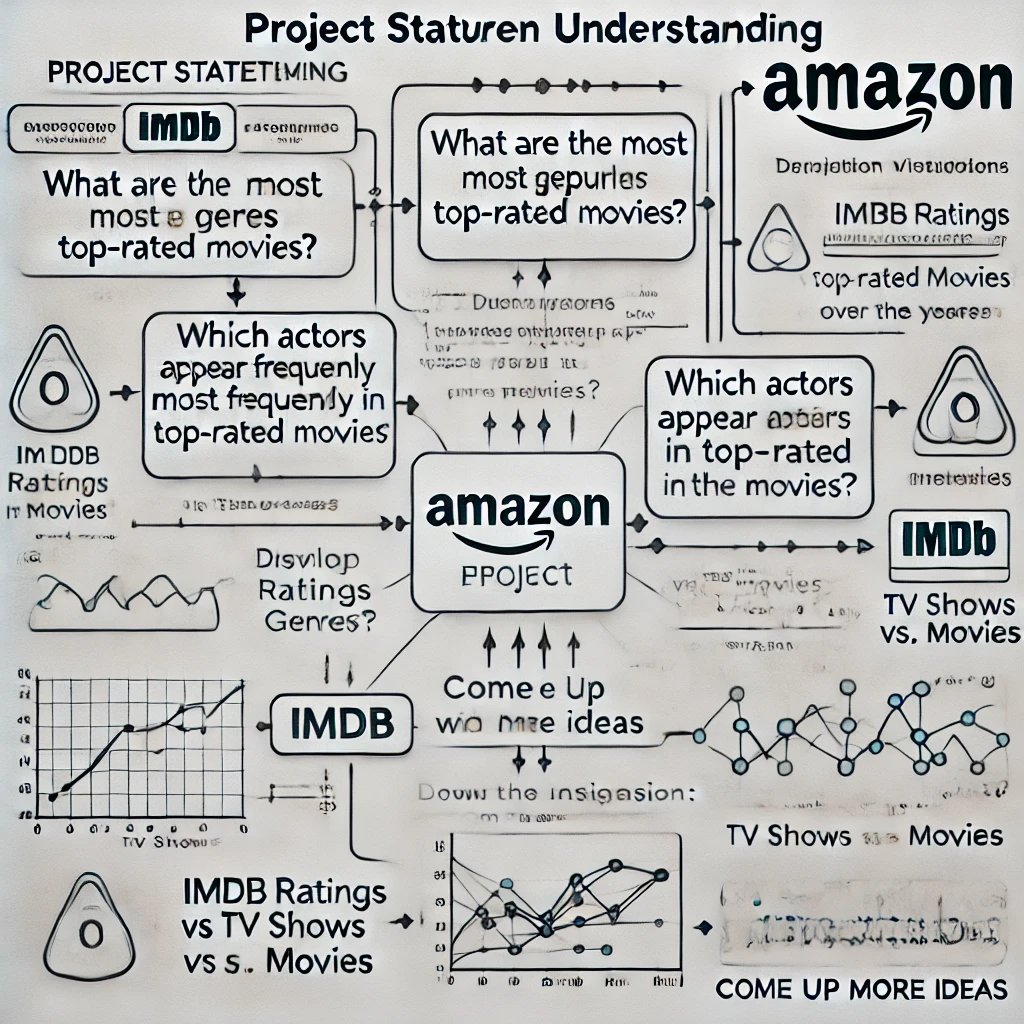

#Let's Start!

## **1. Know Your Data**

###Import Libraries

In [23]:
# Import Libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Statistical data visualization

In [4]:
credits_url="https://raw.githubusercontent.com/manishaachary13/Amazon-Prime/refs/heads/main/credits.csv"
titles_url="https://raw.githubusercontent.com/manishaachary13/Amazon-Prime/refs/heads/main/titles.csv"

####Load Datasets

In [5]:
# Load datasets
credits_df = pd.read_csv(credits_url)
titles_df = pd.read_csv(titles_url)

####dataset first view


In [6]:
# Display first few rows
print(credits_df.head())
print(titles_df.head())

   person_id       id           name      character   role
0      59401  ts20945     Joe Besser            Joe  ACTOR
1      31460  ts20945     Moe Howard            Moe  ACTOR
2      31461  ts20945     Larry Fine          Larry  ACTOR
3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR
4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          194

#### Dataset shape

In [7]:
print(credits_df.shape)
print(titles_df.shape)

(124235, 5)
(9871, 15)


#### Dataset info

In [8]:
credits_df.info()
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   in

####Duplicate Values


In [9]:
print(credits_df.duplicated().sum())


56


In [10]:
print(titles_df.duplicated().sum())

3


####/missing Value

In [11]:
credits_df.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


In [12]:
titles_df.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


#### What did you know about your datasets?


We have two datasets:
1. credits.csv (124,235 rows, 5 columns) – Contains information about cast and crew.
2. titles.csv (9,871 rows, 15 columns) – Contains details about movies and TV shows.

1. credits.csv
* Columns: person_id, id, name, character, role
* Duplicates: 56 duplicate rows
* Null Values: character: 16,287 missing values (likely for crew members who don't play a character)
* Data Types:
Mostly object (string), except person_id (integer)

2. titles.csv
* Columns: id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score
* Duplicates: 3 duplicate rows
* Null Values:
description: 119 missing
 , age_certification: 6,487 missing (likely because many titles don’t have a rating)
, seasons: 8,514 missing (likely because they are movies, not TV shows)
, imdb_id: 667 missing
, imdb_score: 1,021 missing
, imdb_votes: 1,031 missing
, tmdb_popularity: 547 missing
, tmdb_score: 2,082 missing
* Data Types:
float64 (ratings, votes, scores)
, int64 (release year, runtime)
and object (title, genre, country, etc.)

# Data PreProccessing

#### Handling missing values

In [13]:
credits_df["character"].fillna("Unknown")

titles_df["description"].fillna("No description available")
titles_df["seasons"].fillna(0).astype(int)  # Assuming missing values are movies


,seasons
0,26
1,0
2,0
3,0
4,0
...,...
9866,0
9867,0
9868,0
9869,0


In [14]:
# Fill missing numerical columns with median values
titles_df["imdb_score"].fillna(titles_df["imdb_score"].median())
titles_df["tmdb_score"].fillna(titles_df["tmdb_score"].median())
titles_df["tmdb_popularity"].fillna(titles_df["tmdb_popularity"].median())


,tmdb_popularity
0,15.424
1,8.647
2,8.435
3,11.270
4,8.273
...,...
9866,1.406
9867,0.600
9868,1.960
9869,0.645


In [15]:
# Optional: Drop 'age_certification' if it's not useful
titles_df.drop(columns=["age_certification"], inplace=True)


In [16]:
### 2️⃣ Removing Duplicates ###
credits_df.drop_duplicates(inplace=True)
titles_df.drop_duplicates(inplace=True)

In [19]:
### 3️⃣ Convert Data Types ###
titles_df["release_year"] = pd.to_datetime(titles_df["release_year"], format='%Y')
titles_df["seasons"] = titles_df["seasons"].fillna(0).astype(int)
titles_df["imdb_votes"] = pd.to_numeric(titles_df["imdb_votes"], errors='coerce')
titles_df["tmdb_popularity"] = pd.to_numeric(titles_df["tmdb_popularity"], errors='coerce')


In [20]:
### ✅ Re-Check ###
print("Credits DataFrame:\n", credits_df.info())
print("Titles DataFrame:\n", titles_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124179 non-null  int64 
 1   id         124179 non-null  object
 2   name       124179 non-null  object
 3   character  107902 non-null  object
 4   role       124179 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB
Credits DataFrame:
 None
<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9868 non-null   object        
 1   title                 9868 non-null   object        
 2   type                  9868 non-null   object        
 3   description           9749 non-null   object        
 4   release_year          9868 non-null   datetime64[ns]
 5   runtime               9868 

In [21]:
# Save cleaned data (optional)
credits_df.to_csv("cleaned_credits.csv", index=False)
titles_df.to_csv("cleaned_titles.csv", index=False)

# EDA(Exploratory Data Analysis)

#### chart-1: Understand the distribution of indivisual columns.

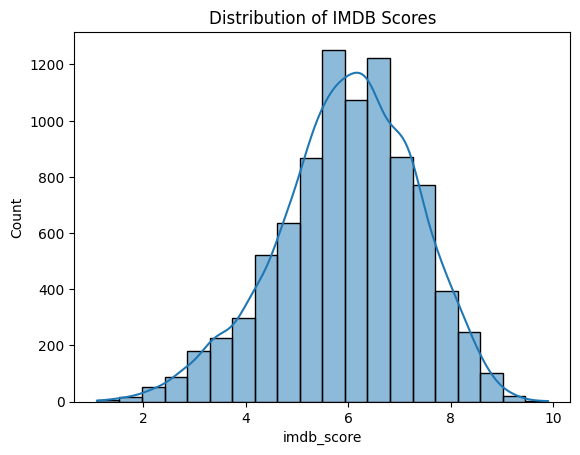

In [26]:
sns.histplot(titles_df['imdb_score'],bins=20, kde=True)
plt.title("Distribution of IMDB Scores")
plt.show()

Why this chart?

A histogram helps visualize the distribution of IMDb scores to understand whether the ratings are normally distributed, skewed, or have anomalies.

Insights Gained:

If the majority of movies/shows have higher scores (e.g., 7-9), it suggests a high-quality content catalog.
If many ratings are below 5, the platform may have a lot of poorly rated content, affecting user satisfaction.
A bimodal distribution might indicate the presence of both critically acclaimed and poorly rated content.

Focus marketing efforts on highly rated content to attract more viewers.
Analyze why lower-rated content exists—consider removing or improving such titles.
If high-rated movies belong to a specific genre, invest more in producing/acquiring similar content.

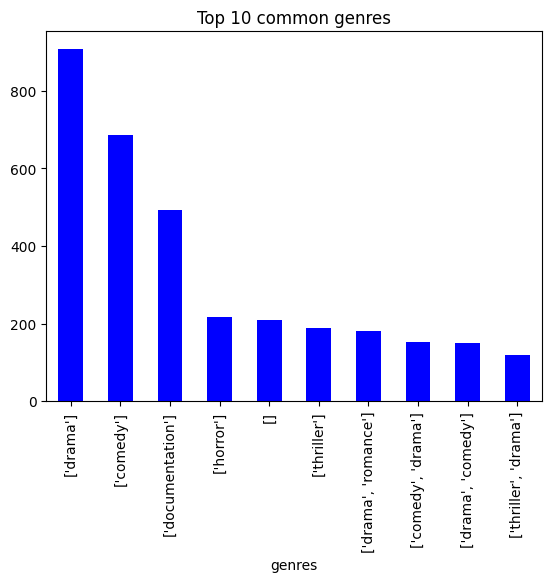

In [29]:
top_gen=titles_df['genres'].value_counts().head(10)
top_gen.plot(kind="bar", color="blue")
plt.title("Top 10 common genres")
plt.show()

Why this chart?

A bar chart effectively visualizes the frequency of each genre in the dataset.
It helps identify which genres dominate the content library and which are less represented.

Drama is the most common genre, followed by Comedy and Documentation.
Horror and Thriller are moderately present.
The presence of empty brackets [] suggests some titles may lack genre classification.
Some genres appear as combinations (e.g., ['drama', 'romance']), which means multi-genre content is present but not as frequent as standalone genres.

Since Drama is the most common, the platform can create a "Best Drama Picks" section for users.
Comedy and Documentation being highly represented suggests they are popular, so highlight these genres in recommendations.
Address missing genre classifications ([]) to improve searchability and recommendations.

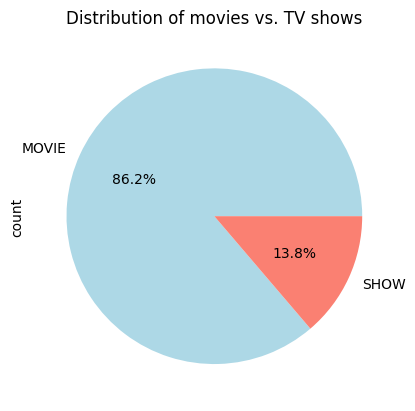

In [30]:
titles_df["type"].value_counts().plot(kind="pie",autopct="%1.1f%%", colors=['lightblue',"salmon"])
plt.title("Distribution of movies vs. TV shows")
plt.show()

Why this chart?

A pie chart is useful for categorical comparisons, showing the proportion of Movies vs. TV Shows.

Insights Gained:

A larger percentage of movies suggests users may prefer shorter content.

Business Recommendations:
If users prefer movies, focus on acquiring blockbuster films.
If TV shows are dominant, invest in exclusive TV series production.

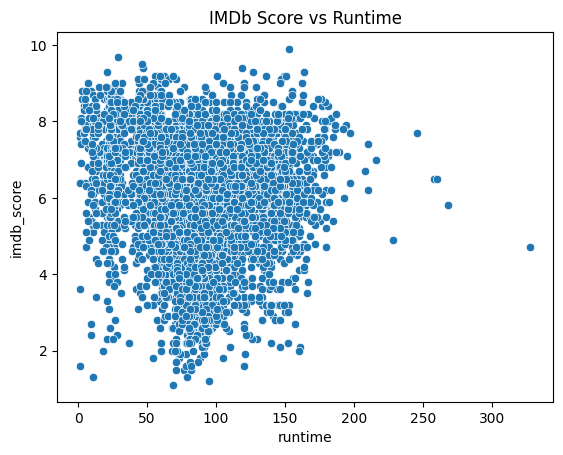

In [31]:
# IMDb score vs. Runtime
sns.scatterplot(x="runtime", y="imdb_score", data=titles_df)
plt.title("IMDb Score vs Runtime")
plt.show()


 Why this chart?

A scatter plot is ideal for analyzing relationships between two numerical variables.
This visualization helps determine if movie length (runtime) impacts IMDb scores.

 Insights Gained:

Most movies have a runtime between 50-150 minutes and show IMDb scores across the entire range (1-10).
No strong correlation is visible; both short and long movies can have high or low ratings.
A few outliers exist, with movies longer than 200 minutes, but they do not consistently receive high or low scores.
Densely packed points around 80-120 minutes suggest that most movies fall within this standard length.

Business Recommendations:

Since there’s no clear impact of runtime on IMDb score, focus on content quality rather than length.

<ipython-input-40-db8cc57b3fc9>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




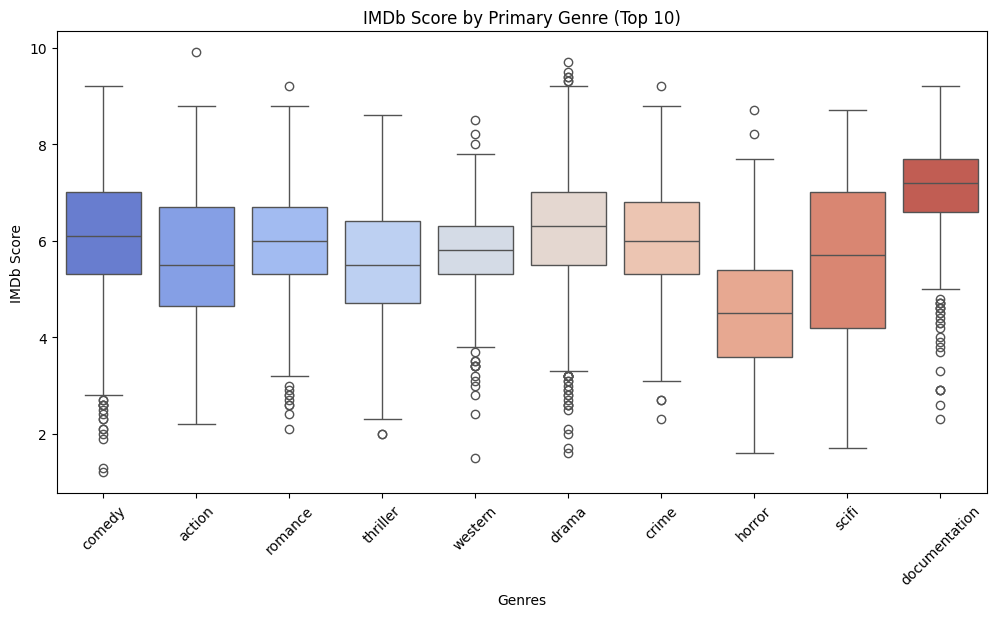

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract first genre from the list
titles_df['primary_genre'] = titles_df['genres'].apply(lambda x: eval(x)[0] if isinstance(x, str) and eval(x) else 'Unknown')

# Filter only the top 10 most common genres
top_genres = titles_df['primary_genre'].value_counts().index[:10]
filtered_df = titles_df[titles_df['primary_genre'].isin(top_genres)]

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_genre', y='imdb_score', data=filtered_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("IMDb Score by Primary Genre (Top 10)")
plt.xlabel("Genres")
plt.ylabel("IMDb Score")
plt.show()


 Why was this chart chosen?
A box plot is ideal for comparing IMDb score distributions across multiple genres. It shows:

Median IMDb score (central line in each box).
Interquartile range (IQR) indicating typical score variation.
Outliers (dots) representing exceptionally high or low scores.

Insights from the chart:
Documentation movies have the highest median IMDb score, suggesting they are generally well-received.
Drama and Crime genres also tend to score higher, with most films rated above 6.0.
Horror movies have the lowest median score, indicating that they receive mixed or lower ratings.
Genres like Comedy, Action, and Romance have wider score distributions, meaning they have both hits and misses.
Outliers are present in almost every genre, showing that some movies perform exceptionally well (or poorly).

Streaming Platforms:

Prioritize Documentation & Drama films (higher ratings).
Improve Horror content quality (low median score).
Highlight top-performing outliers as key attractions.

 Movie Production:

Invest more in Drama & Crime (strong audience engagement).
Enhance Horror movie quality to boost ratings.
Explore genre-blending (e.g., Horror-Thriller) for better performance.

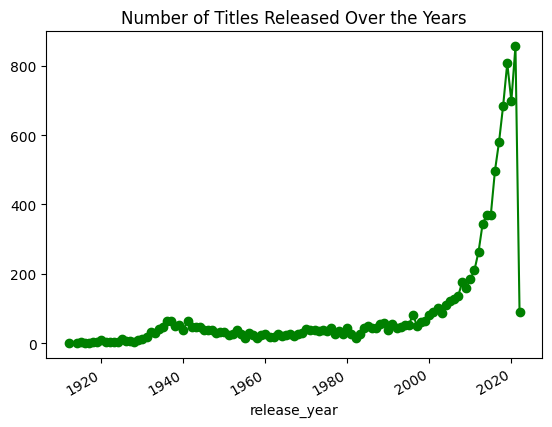

In [33]:
# Number of Titles Released Over the Years
titles_per_year = titles_df.groupby("release_year").size()
titles_per_year.plot(kind="line", marker="o", color="green")
plt.title("Number of Titles Released Over the Years")
plt.show()


Why this chart?
A line chart effectively shows trends over time, making it suitable for analyzing the growth in movie releases.

Insights:

There is a steady increase in releases over the years, with an exponential rise after 2000.
A sharp drop at the end (possibly due to incomplete data for the last year).
The highest number of titles released occurred around 2020.

 Business Recommendations:

Leverage recent trends: Focus on digital distribution as production has surged post-2000.
Investigate the drop: Verify if the latest data is complete or if industry factors (e.g., COVID-19) influenced releases.
Prepare for growth: Streaming platforms should expand their libraries, focusing on content from the 2000s onward.

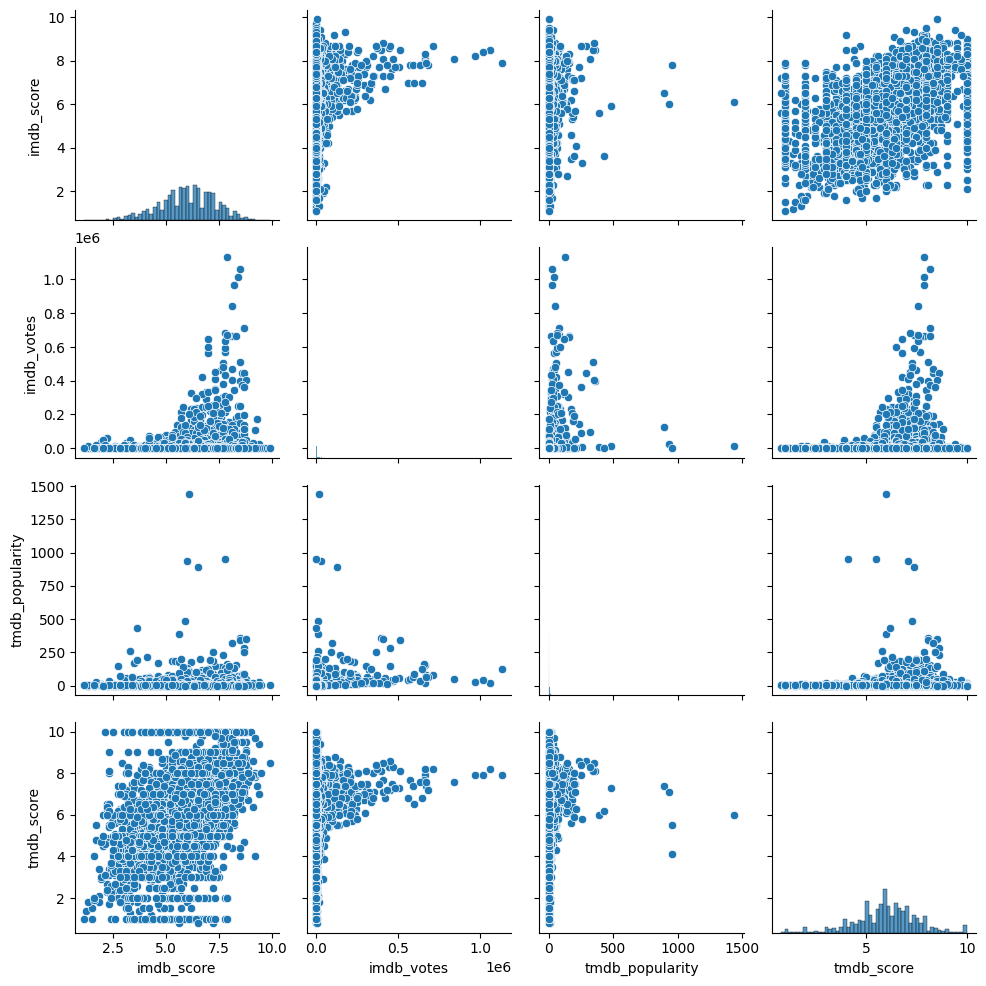

In [43]:
# Pairplot of Numeric Features
sns.pairplot(titles_df[["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]])
plt.show()

Why this chart?
The pairplot is used to explore correlations and distributions between numerical features. It helps identify trends, clusters, and outliers in movie ratings and popularity.



Insights and Outcomes:
✅ IMDb Votes & IMDb Score:

More votes generally lead to higher IMDb scores, though some low-score movies have high votes.
✅ IMDb Votes & TMDb Popularity:

Strong positive correlation—popular movies tend to have more votes.
✅ IMDb Score & TMDb Score:

IMDb and TMDb ratings are similar but not identical—slight differences exist in scoring patterns.
✅ Outliers in Popularity:

A few movies have extremely high TMDb popularity, standing out in the dataset.

 Recommendations:
🔹 If predicting movie popularity, use IMDb Votes as a key feature.
🔹 Investigate outliers in TMDb popularity—these could be blockbusters or movies with viral moments.
🔹 Compare IMDb vs. TMDb rating distributions for potential biases in scoring.

In [37]:
# Where Are Most Movies Produced?
import plotly.express as px
fig = px.choropleth(titles_df,
                    locations="production_countries",
                    locationmode="country names",
                    color="imdb_score",
                    title="Average IMDb Score by Country")
fig.show()


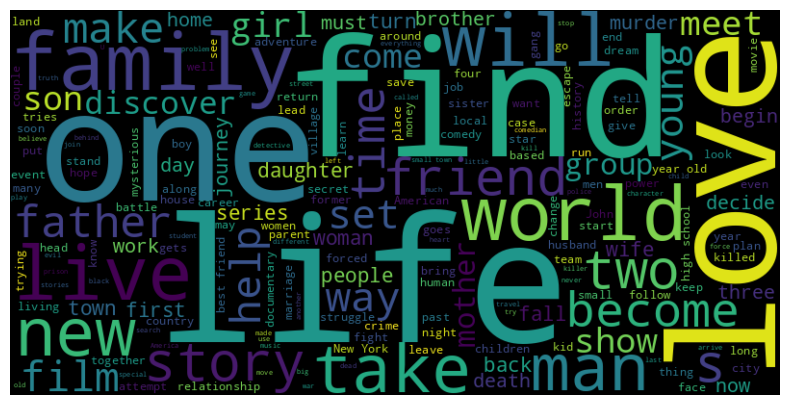

In [38]:
# Most Common Words in Descriptions
from wordcloud import WordCloud
text = " ".join(titles_df["description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Why this chart?
A word cloud visually highlights the most common words, with larger words appearing more frequently. This is useful for identifying key themes and trends in movies.

Insights and Outcomes:
✅ Common Themes in Movies:

"Life," "Love," "World," "Find," "Family," "Friend" → Suggests that movies often explore relationships, emotions, and human experiences.
"Father," "Son," "Daughter," "Mother" → Indicates that family dynamics are a key focus in many films.
✅ Action and Drama Keywords:

Words like "fight," "death," "set," "take," "become" hint at action, conflict, and transformation.
"Discover," "Help," "Story," "Show" indicate themes of adventure, mystery, and personal growth.
✅ Genre-Specific Words:

"Murder," "Secret," "Mystery" → Suggest strong thriller and crime movie influences.
"Comedy," "Series," "Film" → Suggests a mix of genres covered in the dataset.


 Recommendations:
🔹 For movie recommendations, focus on themes like love, family, and adventure, as they are most common.
🔹 If analyzing popular movie genres, further categorize these words to understand dominant themes.
🔹 For title generation in content creation, using words like "life," "love," and "find" might enhance engagement.

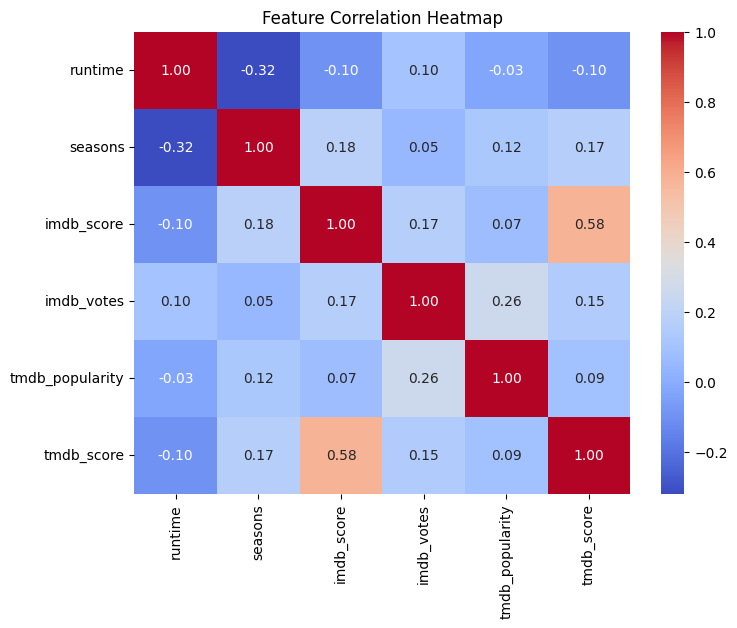

In [39]:

# Select only numeric columns for correlation
numeric_df = titles_df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Why this chart?
A correlation heatmap is useful to identify the relationships between different numerical variables. It helps in:
✔️ Detecting strong relationships (positive or negative).
✔️ Identifying multicollinearity, which is crucial for regression modeling.
✔️ Finding insights about movie/series performance.



 Purpose of the chart?
To understand how different features like runtime, seasons, IMDb score, votes, and TMDB popularity are related.
To find which factors influence IMDb and TMDB scores the most.
To guide feature selection for machine learning models.


Insights and Outcomes:
✅ IMDb Score vs. TMDB Score → 0.58 (Moderate-Strong Positive Correlation)

IMDb and TMDB scores tend to move in the same direction.
Higher IMDb ratings generally mean higher TMDB ratings.
✅ IMDb Score vs. IMDb Votes → 0.17 (Weak Positive Correlation)

More votes do not necessarily mean a higher IMDb score.
Some movies/shows may be popular but not highly rated.
✅ IMDb Votes vs. TMDB Popularity → 0.26 (Weak-Moderate Correlation)

Movies with more votes tend to be more popular on TMDB, but it’s not a strong trend.
✅ Runtime vs. Seasons → -0.32 (Negative Correlation)

Shows with more seasons generally have shorter runtime per episode.
This makes sense since long-running shows often have shorter episodes.


Recommendations:
🔹 Feature Selection for ML Models

IMDb score and TMDB score are correlated, so including both may introduce redundancy.
TMDB popularity & IMDb votes can be used as independent predictors of success.
🔹 Business Insights for Movie/TV Producers

Longer movies ≠ higher IMDb ratings, so runtime should not be a primary factor in production decisions.
If a show has many seasons, keeping episodes shorter might retain audience engagement.